In [1]:
import cv2
import matplotlib.pyplot as plt
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
IMAGES_DIR = 'input-images'

left = cv2.imread(os.path.join(IMAGES_DIR, 'Cones', 'im0.png'))
right = cv2.imread(os.path.join(IMAGES_DIR, 'Cones', 'im1.png'))

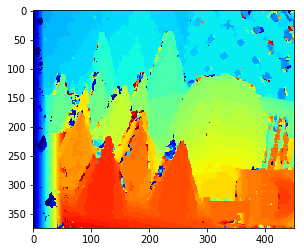

In [16]:
import stereo as st

disparity = st.disparity(left, right, method=st.METHOD_SSD, max_search=60)

plt.imshow(disparity, cmap='jet')